In [1]:
#import necessary lib
import numpy as np 
import pandas as pd
from util import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('file.csv')  #original file

In [4]:
print(df.head())
df.shape[0]

   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad


219294

In [5]:
#copy data for further analysis
data= df.copy()
data.head()
data.shape

(219294, 3)

In [6]:
data.drop(columns=['Unnamed: 0'],inplace=True)   #drop unnecessary columns
data.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [7]:
data['labels'].value_counts()

labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64

In [8]:
#mapping labels 
mapping = {     
    'bad': 0,
    'neutral': 1,
    'good': 2,
}
data['encoded_label'] = data['labels'].map(mapping)
data.head()

,tweets,labels,encoded_label
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,1
1,"Try talking with ChatGPT, our new AI system wh...",good,2
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,1
3,"THRILLED to share that ChatGPT, our new model ...",good,2
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,0


In [9]:
#drop missing values
data.dropna(inplace=True)
data.isna().sum()

tweets           0
labels           0
encoded_label    0
dtype: int64

In [10]:
data.head()

,tweets,labels,encoded_label
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,1
1,"Try talking with ChatGPT, our new AI system wh...",good,2
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,1
3,"THRILLED to share that ChatGPT, our new model ...",good,2
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,0


In [12]:
preprocess_text_DL(df,'Cleaned_Data_DL.csv')

219294
Number of retweets: 394 rows
Number of duplicates: 1645 rows
Duplicate rows:
        Unnamed: 0                                             tweets   labels
281            281  Me: Tell me a story about a cybernetic shrimp ...      bad
589            589  OpenAI ChatGPT: Optimizing language models for...  neutral
1887          1887                                            ChatGPT      bad
2224          2224                                            ChatGPT      bad
2719          2719                                            ChatGPT      bad
...            ...                                                ...      ...
219253      219253  I just came across https://t.co/r7OwPYnLYd\nIt...     good
219254      219254  Check out this book Mallory co-wrote with #Cha...     good
219255      219255  ChatGPT fails the Wason Selection Task (the fi...      bad
219256      219256  Let’s try ChatGPT. Is it any good? https://t.c...  neutral
219258      219258  Can't wait to see how Artif

,Unnamed: 0,tweets,labels
0,0,ChatGPT Optimizing Language Models for Dialogu...,neutral
1,1,Try talking with ChatGPT our new AI system whi...,good
2,2,ChatGPT Optimizing Language Models for Dialogu...,neutral
3,3,THRILLED to share that ChatGPT our new model o...,good
4,4,As of minutes ago OpenAI released their new C...,bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked ChatGPT to write a NYE Joke for SEOs a...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,predictions by chatGPT Nothing really specifi...,bad


In [10]:
 data_clean=preprocess_text(data)

500
Number of duplicates: 1 rows
Duplicate rows:
                                                tweets labels  encoded_label
281  Me: Tell me a story about a cybernetic shrimp ...    bad              0
Number of rows after removing duplicates: 499


In [11]:
data_clean.head()

,tweets,labels,encoded_label
0,optimize language model dialogue,neutral,1
1,try talk new ai system optimize dialogue feedb...,good,2
2,optimize language model dialogue ai machinelea...,neutral,1
3,thrilled share new model optimize dialog publi...,good,2
4,minute ago release new innand use right,bad,0


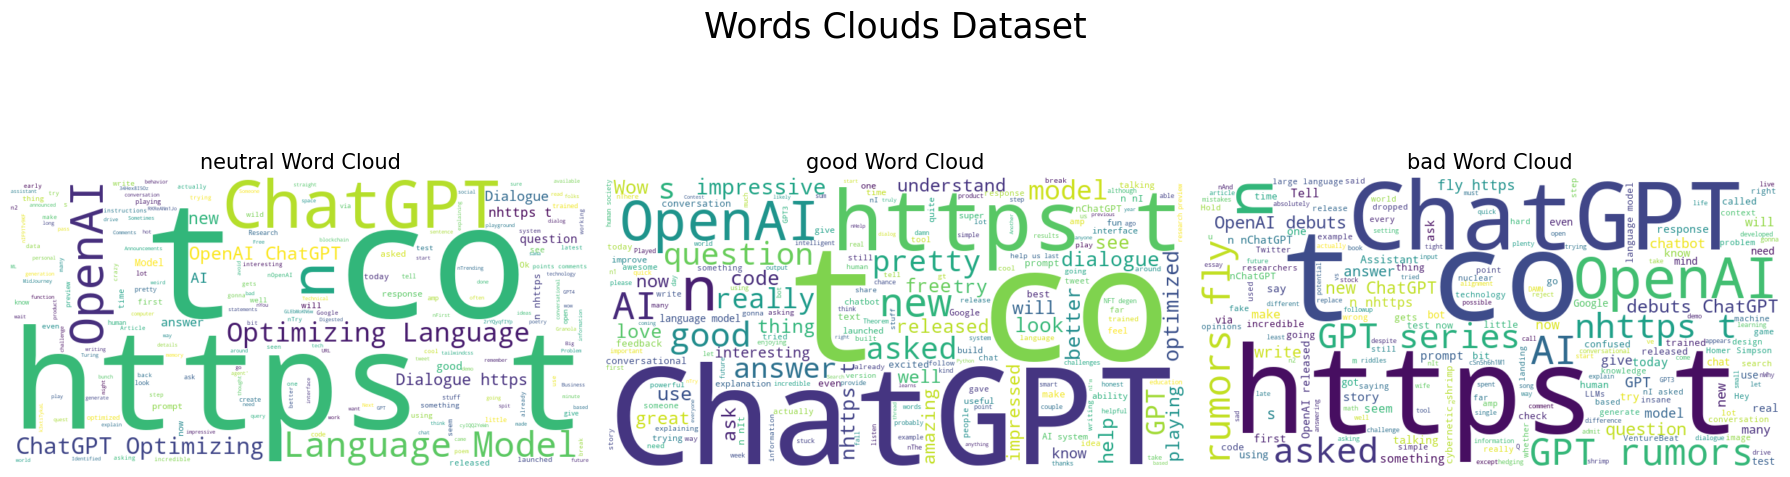

In [12]:
plot_word_clouds(data)

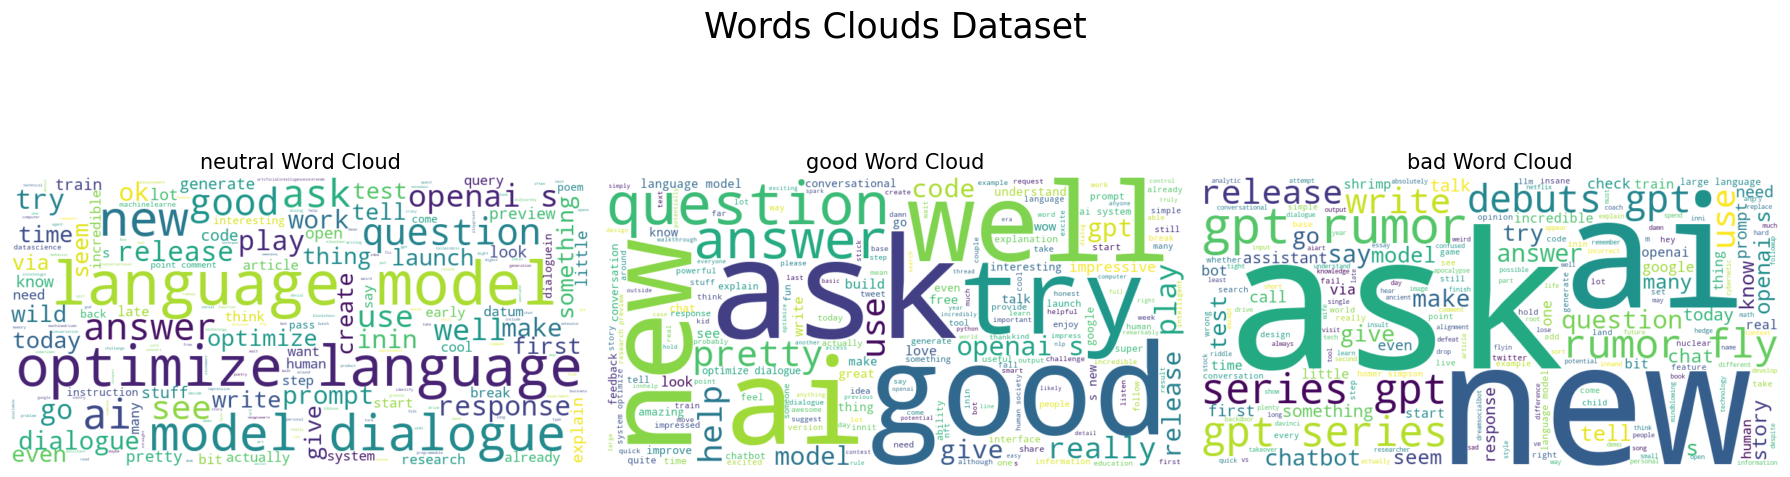

In [13]:
plot_word_clouds(data_clean)